# Home Assignment 1
## Group 3
- Diogo Araújo, fcXXXXX  - (?)H
- João Braz, fc60419     - (?)H
- Joel Oliveira, fc59442 - (?)H

In [85]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from time import time

from scipy.sparse import dok_matrix
from scipy.sparse.linalg import svds

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, max_error, ConfusionMatrixDisplay, confusion_matrix, matthews_corrcoef

np.seterr(divide='ignore', invalid='ignore');

In [2]:
# Merge the two datasets
df = pd.read_csv("train.csv").merge(
    pd.read_csv("unique_m.csv"), 
    left_index=True, 
    right_index=True
)
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp_y,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [3]:
# Separate dependent and independent sets
X = df.drop(columns=["critical_temp_x", "critical_temp_y", "material"])
y = df.critical_temp_x

In [4]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [79]:
X_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
2915,5,95.891840,54.218519,73.468530,35.684328,1.417888,1.571195,158.96740,7.961206,55.618703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3532,5,68.975310,52.166945,54.601832,35.695649,1.417052,1.298332,121.32760,21.642785,41.946967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4002,5,38.834940,35.215547,35.512542,31.782735,1.530118,1.401505,47.54660,10.319767,15.133740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
10044,1,112.411000,112.411000,112.411000,112.411000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3553,5,88.936744,52.703157,70.358975,35.893190,1.445824,1.351537,122.90607,20.662714,46.482335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


## Objective 1 - Dimensionality reduction

In [20]:
print(f"Percentage of 0's in the X matrix = {(X_train==0).sum().sum() / np.prod(X_train.shape):.3f}")

Percentage of 0's in the X matrix = 0.495


Roughly half of the data contains non-null elements. <br>
We will use PCA for the dimensionality reduction, as the majority of the matrix is dense.

In [21]:
#create a scaler to compare data with and without scaling
scaler = StandardScaler().fit(X_train)

In [24]:
n_elements_pca = len(PCA(n_components=0.9, svd_solver='full').fit(X_train).explained_variance_)
n_scaled_elements_pca = len(PCA(n_components=0.9, svd_solver='full').fit(
    scaler.transform(X_train)
).explained_variance_)

print(f"Number of components to reach 90% explainability with non-scaled dataset = {n_elements_pca}")
print(f"Number of components to reach 90% explainability with scaled dataset = {n_scaled_elements_pca}")

Number of components to reach 90% explainability with non-scaled dataset = 2
Number of components to reach 90% explainability with scaled dataset = 66


Both scenarios have a good decrease in the number of features. Originally there were 170.

In [70]:
#function to scatter in pre-defined axis
def scatter(x, y, c, ax, xlabel="", ylabel="", title="", cmap="seismic"):
    ax.scatter(x,y,c=c, cmap=cmap, s=3)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


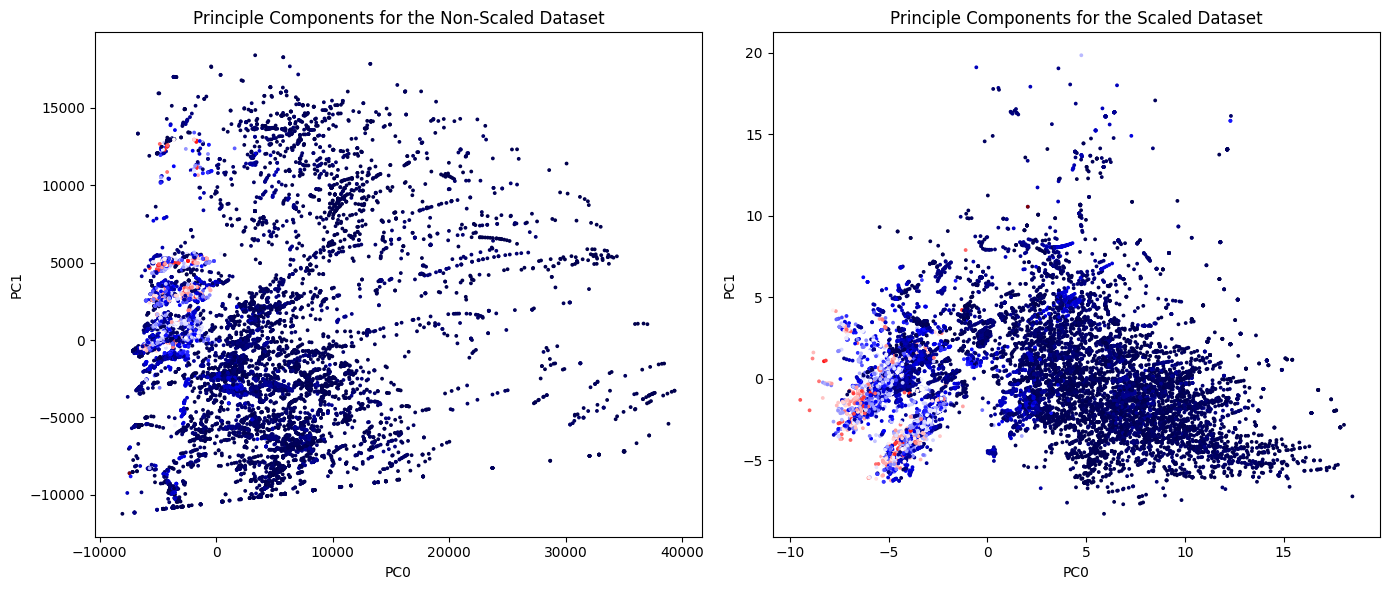

In [74]:
f, ax = plt.subplots(1,2, figsize=(14,6))

X_train_reduced = PCA(n_components=0.9, svd_solver='full').fit_transform(X_train)
X_train_scaled_reduced = PCA(n_components=0.9, svd_solver='full').fit_transform(
    scaler.transform(X_train)
)

scatter(X_train_reduced[:,0], X_train_reduced[:, 1], y_train, ax[0], "PC0", "PC1", "Principle Components for the Non-Scaled Dataset")
scatter(X_train_scaled_reduced[:,0], X_train_scaled_reduced[:, 1], y_train, ax[1], "PC0", "PC1", "Principle Components for the Scaled Dataset")

f.tight_layout()

From the figure above, it seems that even though the original dataset has only 2 components to explain all the variance, the scaled dataset clusters the data better with it's 2 main components. 

## Objetivo 2 - Create a Regression and a Classification Model

### 2.1 Regression Model

For this section we will use Decision Tree, as PCA components are decorrelated between themselves. With no linear relation between components we do not expect Linear Regression to have a good performance.

In [89]:
t =time()
dtr = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", DecisionTreeRegressor())
]).fit(X_train, y_train)
print(f"Fit time without PCA = {time() - t:.3f}")

t = time()
dtr_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("dim", PCA(n_components=0.9, svd_solver="full")),
    ("regressor", DecisionTreeRegressor())
]).fit(X_train, y_train)
print(f"Fit time with PCA = {time() - t:.3f}")


Fit time without PCA = 1.877
Fit time with PCA = 1.939
